In [1]:
import webber
import matplotlib.pyplot as pyplot
from time import time, sleep

We start by imagining a series of Python processes of interdependent function that can be executed in parallel. 

In [2]:
def print_and_wait(x):
    print(x)
    sleep(1)

In [3]:
start_time = time()

for i in range(1, 5):
    print_and_wait(i)

print(f'Time in series: {time() - start_time}')

1
2
3
4
Time in series: 4.0020363330841064


These processes are mostly independent of each other, however, and can be more efficiently executed in parallel.

In [4]:
# We'll start by constructing a new directed acyclic graph, or DAG:
dag = webber.DAG()

# Then, we'll add nodes to the DAG which will represent our process:
for i in range(1, 5):
    dag.add_node(print_and_wait, i)

In [5]:
# Now, we can execute with a significant reduction in time:
start_time = time()

dag.execute()

print(f'Time in parallel: {time() - start_time}')

2024-11-10 12:07:31,395  print_and_wait: 4
2024-11-10 12:07:31,396  print_and_wait: 3
2024-11-10 12:07:31,398  print_and_wait: 2
2024-11-10 12:07:31,400  print_and_wait: 1
Time in parallel: 1.0601632595062256


A catch is that, as a result of this change, we've lost the sequential order of operations in our previous loop. 

If we want to retain this along with concurrency's speed, we can rewrite the job to use edges and ensure proper order of execution.

In [6]:
new_dag = webber.DAG()

previous_printer = None

for i in range(1, 5):
    
    # This abstracts the previous operation: print a value, then sleep for one second
    printer = new_dag.add_node(print, i)
    waiter  = new_dag.add_node(sleep, 1)
    new_dag.add_edge(printer, waiter)

    # In addition, we will add directed edges between each of the print functions 
    # so that prints are only executed in order! 
    if previous_printer != None:
        new_dag.add_edge(previous_printer, printer)

    # We'll update our temporary variable for future reference
    previous_printer = printer

In [7]:
# Now, when we execute:
start_time = time()

new_dag.execute()

print(f'Time in parallel: {time() - start_time}')

2024-11-10 12:07:35,580           print: 1
2024-11-10 12:07:35,651           print: 2
2024-11-10 12:07:35,723           print: 3
2024-11-10 12:07:35,734           print: 4
Time in parallel: 1.224787950515747


It can be difficult to appreciate or abstract what we've just done without visualizing it. Let's try comparing our two DAGs with the visualization library:

> Note: Make sure that you are using an interactive backend for Matplotlib for the best experience with this module. Webber has tested best with the backend `ipympl`.
> 
> Official documentation can be found here: https://matplotlib.org/stable/users/explain/figure/backends.html


In [ ]:
%matplotlib ipympl

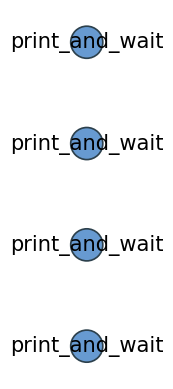

In [8]:
dag.visualize()

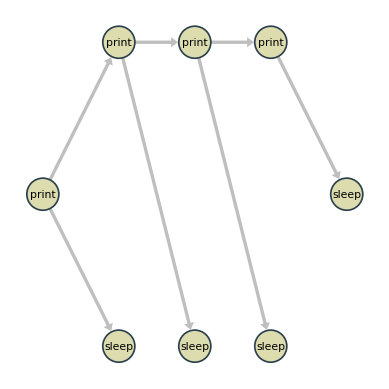

In [9]:
new_dag.visualize()